# Домашнее задание 4
## Text Normalization 

deadline: 18 декабря 2022, 23:59

В этом домашнем задании вы будете работать с корпусом соревнования по нормализации текстов на русском языке. 

Ссылка на соревнование:
https://www.kaggle.com/competitions/text-normalization-challenge-english-language

Корпус (train-test split) доступен там же, на kaggle. Кроме того, kaggle проверяет результаты на тестовом множестве. Пример сабмита в файле: en_sample_submission_2. 

Задача заключается в том, привести исходный текст (колонку before) в нормализованную форму (колонка after). Дополнительно известны классы токенов (колонка class). В тестовом множестве классы токенов отсутствуют. 

Корпус состоит из предложений на английском языке и их нормализованных аналогов. Примеры продемонстрированы на kaggle.

## ПРАВИЛА
1. Домашнее задание выполняется в группе до 4-х человек.
2. Домашнее задание оформляется в виде отчета либо в .pdf файле, либо в ipython-тетрадке. Также обязательно прикладывать ipynb-файл. 
3. Отчет должен содержать: нумерацию заданий и пунктов, которые вы выполнили, код решения, и понятное пошаговое описание того, что вы сделали. Отчет должен быть написан в академическом стиле, без излишнего использования сленга и с соблюдением норм русского языка.
4. Не стоит копировать фрагменты лекций, статей и Википедии в ваш отчет.
5. Отчеты, состоящие исключительно из кода, не будут проверены и будут автоматически оценены нулевой оценкой.
6. Плагиат и любое недобросовестное цитирование приводит к обнулению оценки. 

## Часть 1. [2 балла] Эксплоративный анализ

1. Найдите примеры каждого класса и опишите, по какой логике проведена нормализация токенов разных классов. 
2. В каких случаях токены класса PLAIN подвергаются нормализации? 
3. Напишите правила для нормализации токенов класса ORDINAL. 

In [1]:
!pip install allennlp==0.9.0 overrides==3.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

df_train = pd.read_csv('/content/drive/MyDrive/data/hw4/en_train.csv.zip')
#df_test = pd.read_csv('/content/drive/MyDrive/data/hw4/en_test.csv.zip')
df_test2 = pd.read_csv('/content/drive/MyDrive/data/hw4/en_test_2.csv.zip')

In [3]:
df_train.head()

,sentence_id,token_id,class,before,after
0,0,0,PLAIN,Brillantaisia,Brillantaisia
1,0,1,PLAIN,is,is
2,0,2,PLAIN,a,a
3,0,3,PLAIN,genus,genus
4,0,4,PLAIN,of,of


In [5]:
from IPython.display import display

unique_classes = df_train['class'].unique()
for class_type in unique_classes:
    sample = df_train[df_train['class'] == class_type]
    sample = sample[sample['before'] != sample['after']]
    n_samples = sample.shape[0]
    print('-----------------------------')
    print(f'{class_type}:')
    if n_samples == 0:
        print('No normilized text')
    sample = sample.sample(min(5, n_samples), random_state=7)
    display(sample[['before', 'after']])
    

-----------------------------
PLAIN:


,before,after
1796894,st,saint
843710,privatised,privatized
5320884,-,to
7212384,-,to
1261509,mr,mister


-----------------------------
PUNCT:
No normilized text


,before,after


-----------------------------
DATE:


,before,after
1582784,1844,eighteen forty four
9191326,1971,nineteen seventy one
4094975,"December 22, 1953",december twenty second nineteen fifty three
9373710,1945,nineteen forty five
7386771,1971,nineteen seventy one


-----------------------------
LETTERS:


,before,after
2049248,WAFL,w a f l
6051043,USA,u s a
4014292,IFNA,i f n a
2277225,Ce,c e
9151100,L.M.,l m


-----------------------------
CARDINAL:


,before,after
2717228,"1,215",one thousand two hundred fifteen
4732561,323,three hundred twenty three
5850917,1,one
2814096,2,two
6270773,25,twenty five


-----------------------------
VERBATIM:


,before,after
5063918,&,and
6230401,&,and
4923515,pg,p g
8995636,pp,p p
4663348,&,and


-----------------------------
DECIMAL:


,before,after
6408480,.188,point one eight eight
8007448,63,sixty three
4953631,4.34,four point three four
3013154,.260,point two six o
5811606,2.6,two point six


-----------------------------
MEASURE:


,before,after
2777250,8 km,eight kilometers
5032080,5.9%,five point nine percent
2003227,100m,one hundred meters
8473785,7 mm,seven millimeters
5519303,0.6 m,zero point six meters


-----------------------------
MONEY:


,before,after
4319419,$19.19 billion,nineteen point one nine billion dollars
8073698,"$35,086",thirty five thousand eighty six dollars
3218472,$500,five hundred dollars
5938605,$1.7 Billion,one point seven billion dollars
812672,$100,one hundred dollars


-----------------------------
ORDINAL:


,before,after
8862328,12th,twelfth
4563816,3rd,third
2365279,12th,twelfth
4900400,2nd,second
9519003,6007th,six thousand seventh


-----------------------------
TIME:


,before,after
558492,10PM,ten p m
2020957,21:55,twenty one fifty five
2762646,3:59,three fifty nine
1397528,6 pm,six p m
6771676,5 PM,five p m


-----------------------------
ELECTRONIC:


,before,after
2935388,aapIASI.ro,a a p i a s i dot r o
1836742,TODAY.com,t o d a y dot c o m
9562643,Ma.co.bi,m a dot c o dot b i
4494284,shakenstir.co.uk,s h a k e n s t i r dot c o dot u k
5658876,//www.hindustantimes.com/Weightlifter-Sanamach...,s l a s h s l a s h w w w dot h i n d u s t a ...


-----------------------------
DIGIT:


,before,after
7542949,9801,nine eight o one
5030007,58201,five eight two o one
6658162,8,eight
4434948,41,four one
696136,2003,two o o three


-----------------------------
FRACTION:


,before,after
6789631,5/23,five twenty thirds
2514721,4/7,four sevenths
3841299,12/16,twelve sixteenths
7880628,245/1948,two hundred forty five one thousand nine hundr...
4334202,189/2004,one hundred eighty nine two thousand fourths


-----------------------------
TELEPHONE:


,before,after
1402019,80-244-0671-3,eight o sil two four four sil o six seven one ...
780225,36(1) 145-49,three six sil one sil one four five sil four nine
9026949,978-973-117-141-8,nine seven eight sil nine seven three sil one ...
2244053,0-9529975-0-9,o sil nine five two nine nine seven five sil o...
569692,0-7234-2918-9,o sil seven two three four sil two nine one ei...


-----------------------------
ADDRESS:


,before,after
9870989,I-49,i forty nine
9821666,A1689,a one six eight nine
6258587,A79,a seventy nine
4649149,SR 195,s r one ninety five
5807913,I-96,i ninety six


В общем случае токены нормализуются до текста, который человек произнес бы словами. Сокращения нормализуются до полной версии слов, некоторые знаки препинания (-, & и т.д) в соответствующие им слова (to, and). Нормализуются опечатки в словах. Дата, время, и числа нормализуются до их текстового варианта написания (в том числе и порядковые числа, дроби). Аббревиатуры разделяются по символам, которые приводятся в нижний регистр. Знаки валют также нормализуются до слов. Ссылки переводятся в нижний регистр, разделяются по символам, '/' заменяется на 's l a s h' (также разделенный), точка заменяется на 'dot'. Телефонные номера разделяются на цифры, записанные текстом, разделительные знаки нормализуются как 'sil'.

In [6]:
sample = df_train[df_train['class'] == 'PLAIN']
sample[sample['before'] != sample['after']][['before', 'after']].drop_duplicates().sample(20, random_state=10)

,before,after
5146615,Dudenstrasse,duden strasse
304540,Metre,meter
6599726,BLDG,building
6846900,Danemarkstrasse,danemark strasse
9637558,nuʻuanu,nuuanu
7422452,Reorganised,reorganized
4388318,Attilastrasse,attila strasse
7257955,ali'i,alii
357916,Naturalisation,naturalization
5641,advertising,advertizing


Токены класса PLAIN подвергаются нормализации в случаях сокращения слова, наличия апострофов в нем. Немецкие названия улиц (заканчивающиеся на strasse) разделяются на два слова. Нормализуются токены, имеющие отличные друг от друга написание и произношение, часто в конце слов s заменяется на z (как слышится). Также все токены приводятся в нижний регистр.

In [7]:
sample = df_train[df_train['class'] == 'ORDINAL']
sample = sample[sample['before'] != sample['after']]
sample[['before', 'after']].drop_duplicates().sample(20, random_state=10)

,before,after
2451694,440th,four hundred fortieth
761701,67th,sixty seventh
6206015,75TH,seventy fifth
4433939,"100,000th",one hundred thousandth
580142,97th,ninety seventh
1502871,2614th,two thousand six hundred fourteenth
3768244,27ª,twenty seventh
269109,68th,sixty eighth
80199,XIVth,fourteenth
303678,53rd,fifty third


In [8]:
sample[sample['after'].str.contains('first')].sample(10, random_state=10)

,sentence_id,token_id,class,before,after
2134744,166215,11,ORDINAL,1st,first
970389,76989,9,ORDINAL,1st,first
8374727,633908,3,ORDINAL,I.,the first
4622128,354020,10,ORDINAL,21st,twenty first
9505941,717561,8,ORDINAL,1st,first
959902,76172,24,ORDINAL,1st,first
4412943,338291,0,ORDINAL,1st,first
8240152,623898,16,ORDINAL,1st,first
3791244,291624,8,ORDINAL,1st,first
9491240,716443,12,ORDINAL,1st,first


In [9]:
sample[sample['before'].str.contains('I')].sample(10, random_state=10)

,sentence_id,token_id,class,before,after
3062324,236533,1,ORDINAL,IV,the fourth
8423112,637464,12,ORDINAL,IV,the fourth
5910552,450502,18,ORDINAL,II's,the second's
663785,52998,7,ORDINAL,XII,the twelfth
2637432,204429,12,ORDINAL,II,the second
5897643,449523,4,ORDINAL,VIII,the eighth
80199,6443,4,ORDINAL,XIVth,fourteenth
5740162,437793,4,ORDINAL,I,the first
8399527,635738,12,ORDINAL,IV,the fourth
9298736,702017,6,ORDINAL,I,the first


In [10]:
sample[sample['before'].str.contains('XI')].sample(10, random_state=10)

,sentence_id,token_id,class,before,after
5246753,400824,15,ORDINAL,XI,eleventh
3072991,237332,2,ORDINAL,XIX,the nineteenth
4044567,310661,13,ORDINAL,XIV,fourteenth
5814495,443289,8,ORDINAL,XIV,the fourteenth
3587813,276272,7,ORDINAL,XIV,the fourteenth
6477115,492539,12,ORDINAL,XI,the eleventh
7429392,563472,2,ORDINAL,XI,eleventh
493422,39579,4,ORDINAL,XIV,the fourteenth
2229210,173399,8,ORDINAL,XI,eleventh
8549719,646817,8,ORDINAL,XIV,fourteenth


In [11]:
print('XI --> eleventh:')
print(' '.join(df_train[df_train['sentence_id'] == 400824]['before']))

XI --> eleventh:
After he defeated Ignaz Gyulai's corps in the Battle of Graz , Napoleon summoned the XI Corps to Vienna .


In [12]:
print('XI --> the eleventh:')
print(' '.join(df_train[df_train['sentence_id'] == 492539]['before']))

XI --> the eleventh:
It was deposited to the Vatican Library in time of Pope Clement XI .


Токены класса ORDINAL нормализуются в соответствии со следующими правилами:
    
Порядковые числа, записанные с помощью арабских цифр нормализуются к стандартной записи порядковых чисел в английском языке: число записывается словами, в конец добавяется 'th'. Для чисел, заканчивающихся на 1, 2, 3 - вместо добавления 'th', one, two, three заменяются на first, second, third.

Можно заметить, что нормализуются не только токены английского языка. Токен 27ª, являющийся порядковым числом в французском языке также нормализуется до twenty seventh.

Римские числа чаще всего заменяются на текстовую запись с добавлением артикля the. Однако есть и примеры, в которых the не добавляется, например the уже был отдельным токеном. Из этого можно сделать интуитивный вывод, что нормализация зависит от контекста.

## Часть 2. [5 баллов]  seq2seq архитектура
Имплементируйте seq2seq архитектуру. Энкодер получает на вход последовательность токенов before, декодер учится превращать их в токены after.
Энкодер и декодер работают на уровне символов, эмбеддинги символов инициализируются случайно (по аналогии с работами, в которых предложены нейросетевые модели исправления опечаток).

[4 балла] Архитектура модели: LSTM encoder + LSTM decoder + три механизма внимания: скалярное произведение, аддитивное внимание и мультипликативное внимание. (1 балл за encoder+decoder и по баллу за каждый механизм внимания)

[1 балл] Используя автопроверку kaggle, оцените, как влияют параметры архитектуры на качество задачи.

Для выполнения задания можно воспользоваться библиотекой allennlp (должно быть проще и удобнее).

In [13]:
#df_train_copy = df_train.copy(deep=True)
#df_test_copy = df_test.copy(deep=True)
#df_test2_copy = df_test2.copy(deep=True)

In [14]:
#df_train['sentence_before'] = df_train['before'] + ' '
#df_train['sentence_after'] = df_train['after'] + ' '
#df_test['sentence_before'] = df_test['before'] + ' '
#df_test2['sentence_before'] = df_test2['before'] + $ '

#df_train = df_train.groupby('sentence_id')[['sentence_before', 'sentence_after']].sum().rename(columns={'sentence_before' : 'before', 'sentence_after' : 'after'})
#df_test = df_test.groupby('sentence_id')[['sentence_before']].sum().rename(columns={'sentence_before' : 'before'})
#df_test2 = df_test2.groupby('sentence_id')[['sentence_before']].sum().rename(columns={'sentence_before' : 'before'})

In [15]:
df_train.head()

,sentence_id,token_id,class,before,after
0,0,0,PLAIN,Brillantaisia,Brillantaisia
1,0,1,PLAIN,is,is
2,0,2,PLAIN,a,a
3,0,3,PLAIN,genus,genus
4,0,4,PLAIN,of,of


In [5]:
from torch import nn
import itertools

import allennlp
from allennlp.data.dataset_readers.seq2seq import Seq2SeqDatasetReader
from allennlp.data.tokenizers.word_tokenizer import WordTokenizer
from allennlp.data.tokenizers.character_tokenizer import CharacterTokenizer
from allennlp.data.instance import Instance

from allennlp.data.token_indexers import SingleIdTokenIndexer
from allennlp.data.vocabulary import Vocabulary
from allennlp.data.iterators import BucketIterator

from allennlp.modules.text_field_embedders import BasicTextFieldEmbedder
from allennlp.modules.token_embedders import Embedding
from allennlp.modules.seq2seq_encoders.pytorch_seq2seq_wrapper import PytorchSeq2SeqWrapper
from allennlp.models.encoder_decoders import SimpleSeq2Seq
from allennlp.modules.seq2seq_encoders.stacked_self_attention import StackedSelfAttentionEncoder

from allennlp.modules.attention.additive_attention import AdditiveAttention
from allennlp.modules.attention.bilinear_attention import BilinearAttention
from allennlp.modules.attention.dot_product_attention import DotProductAttention


from allennlp.training.trainer import Trainer

from allennlp.predictors import SimpleSeq2SeqPredictor

from sklearn.model_selection import train_test_split

In [4]:
HIDDEN_DIM = 64
EMBEDDING_DIM = 256
BATCH_SIZE=64
N_EPOCHS = 4
NUM_LAYERS = 2
MAX_DECODING_STEPS = 75

In [6]:
df_train = df_train.sample(1000000) ## Не хватает ОЗУ

In [7]:
df_test2['after'] = df_test2['before']

In [8]:
from sklearn.model_selection import train_test_split

def prepare_simple_dataset(df, target_file_path):
    data = pd.DataFrame(df[['before', 'after']].values)
    data.to_csv(target_file_path, sep='\t', index=False)

df_train, df_val = train_test_split(df_train, test_size=0.3, random_state=42)
prepare_simple_dataset(df_train, 'df_train.csv')
prepare_simple_dataset(df_val, 'df_val.csv')
prepare_simple_dataset(df_test2, 'df_submit.csv')

In [9]:
import builtins
import functools

old_open = open
uopen = functools.partial(open, encoding='utf8')
builtins.open = uopen

In [10]:
reader = Seq2SeqDatasetReader(
    source_tokenizer=CharacterTokenizer(),
    target_tokenizer=CharacterTokenizer(),
    source_token_indexers={'tokens': SingleIdTokenIndexer()},
    target_token_indexers={'tokens': SingleIdTokenIndexer(namespace='target_tokens')})

dataset_train = reader.read('df_train.csv')
dataset_test = reader.read('df_val.csv')
dataset_submit = reader.read('df_submit.csv')

700001it [00:35, 19602.09it/s]
300001it [00:14, 21107.95it/s]
956047it [00:39, 24480.16it/s]


In [14]:
builtins.open = old_open

In [15]:
vocab = Vocabulary.from_instances(dataset_train + dataset_test + dataset_submit,
                                      min_count={'tokens': 3, 'target_tokens': 3})

embeddings = Embedding(num_embeddings=vocab.get_vocab_size('tokens'),
                         embedding_dim=EMBEDDING_DIM)

source_embedder = BasicTextFieldEmbedder({"tokens": embeddings})

100%|██████████| 1956049/1956049 [00:19<00:00, 101170.05it/s]


In [16]:
iterator = BucketIterator(batch_size=BATCH_SIZE, sorting_keys=[("source_tokens", "num_tokens")])
iterator.index_with(vocab)

## Without attention

In [26]:
import torch

encoder = PytorchSeq2SeqWrapper(nn.LSTM(EMBEDDING_DIM, HIDDEN_DIM, batch_first=True, dropout=0.3, num_layers=NUM_LAYERS))

model = SimpleSeq2Seq(vocab, source_embedder, encoder, MAX_DECODING_STEPS,
                          target_embedding_dim=EMBEDDING_DIM,
                          target_namespace='target_tokens',
                          attention=None)

optimizer = torch.optim.Adam(model.parameters())

trainer = Trainer(model=model,
                  optimizer=optimizer,
                  iterator=iterator,
                  train_dataset=dataset_train,
                  num_epochs=N_EPOCHS,
                  cuda_device=0,
                  )

model.cuda()
trainer.train()
model.cpu()

loss: 0.9798 ||: 100%|██████████| 10938/10938 [04:01<00:00, 45.20it/s]
loss: 0.2314 ||: 100%|██████████| 10938/10938 [03:52<00:00, 47.05it/s]
loss: 0.1251 ||: 100%|██████████| 10938/10938 [03:52<00:00, 46.99it/s]
loss: 0.0907 ||: 100%|██████████| 10938/10938 [04:02<00:00, 45.16it/s]


SimpleSeq2Seq(
  (_source_embedder): BasicTextFieldEmbedder(
    (token_embedder_tokens): Embedding()
  )
  (_encoder): PytorchSeq2SeqWrapper(
    (_module): LSTM(256, 64, num_layers=2, batch_first=True, dropout=0.3)
  )
  (_target_embedder): Embedding()
  (_decoder_cell): LSTMCell(256, 64)
  (_output_projection_layer): Linear(in_features=64, out_features=592, bias=True)
)

In [27]:
from tqdm.notebook import tqdm
import math

def tokens2text(tokens, start=0, end=None):
        tokens = list(tokens)
        end = len(tokens) if end is None else end
        tokens = tokens[start:end]
        text = map(str, tokens)
        text = ''.join(text)
        return text
    
model.cuda()
predictor = SimpleSeq2SeqPredictor(model, reader)

preds = []
for batch_num in tqdm(range(math.ceil(len(dataset_submit) / 100))):
      y_pred = predictor.predict_batch_instance(dataset_submit[batch_num * 100: min(((batch_num + 1) * 100), len(dataset_submit))])
      y_pred = list(map(lambda x : ''.join(x['predicted_tokens']), y_pred))
      preds += y_pred
model.cpu()

  0%|          | 0/9561 [00:00<?, ?it/s]

SimpleSeq2Seq(
  (_source_embedder): BasicTextFieldEmbedder(
    (token_embedder_tokens): Embedding()
  )
  (_encoder): PytorchSeq2SeqWrapper(
    (_module): LSTM(256, 64, num_layers=2, batch_first=True, dropout=0.3)
  )
  (_target_embedder): Embedding()
  (_decoder_cell): LSTMCell(256, 64)
  (_output_projection_layer): Linear(in_features=64, out_features=592, bias=True)
)

In [28]:
df_test2['id'] = df_test2['sentence_id'].astype(str) + '_' + df_test2['token_id'].astype(str)
df_test2['after'] = preds[1:]
df_test2[['id', 'after']].to_csv('no_attn.csv', index=False)

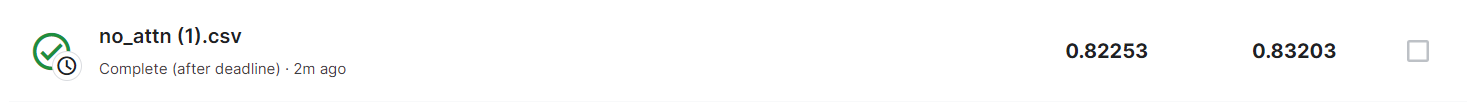

## DotProductAttention

In [29]:
import torch

encoder = PytorchSeq2SeqWrapper(nn.LSTM(EMBEDDING_DIM, HIDDEN_DIM, batch_first=True, dropout=0.3, num_layers=NUM_LAYERS))

model = SimpleSeq2Seq(vocab, source_embedder, encoder, MAX_DECODING_STEPS,
                          target_embedding_dim=EMBEDDING_DIM,
                          target_namespace='target_tokens',
                          attention=DotProductAttention())

optimizer = torch.optim.Adam(model.parameters())

trainer = Trainer(model=model,
                  optimizer=optimizer,
                  iterator=iterator,
                  train_dataset=dataset_train,
                  num_epochs=N_EPOCHS,
                  cuda_device=0,
                  )

model.cuda()
trainer.train()
model.cpu()

loss: 1.0062 ||: 100%|██████████| 10938/10938 [05:51<00:00, 31.16it/s]
loss: 0.0581 ||: 100%|██████████| 10938/10938 [05:48<00:00, 31.40it/s]
loss: 0.0245 ||: 100%|██████████| 10938/10938 [06:04<00:00, 29.97it/s]
loss: 0.0180 ||: 100%|██████████| 10938/10938 [05:54<00:00, 30.89it/s]


SimpleSeq2Seq(
  (_source_embedder): BasicTextFieldEmbedder(
    (token_embedder_tokens): Embedding()
  )
  (_encoder): PytorchSeq2SeqWrapper(
    (_module): LSTM(256, 64, num_layers=2, batch_first=True, dropout=0.3)
  )
  (_attention): DotProductAttention()
  (_target_embedder): Embedding()
  (_decoder_cell): LSTMCell(320, 64)
  (_output_projection_layer): Linear(in_features=64, out_features=592, bias=True)
)

In [30]:
from tqdm.notebook import tqdm
import math

def tokens2text(tokens, start=0, end=None):
        tokens = list(tokens)
        end = len(tokens) if end is None else end
        tokens = tokens[start:end]
        text = map(str, tokens)
        text = ''.join(text)
        return text
    
model.cuda()
predictor = SimpleSeq2SeqPredictor(model, reader)

preds = []
for batch_num in tqdm(range(math.ceil(len(dataset_submit) / 100))):
      y_pred = predictor.predict_batch_instance(dataset_submit[batch_num * 100: min(((batch_num + 1) * 100), len(dataset_submit))])
      y_pred = list(map(lambda x : ''.join(x['predicted_tokens']), y_pred))
      preds += y_pred
model.cpu()

  0%|          | 0/9561 [00:00<?, ?it/s]

SimpleSeq2Seq(
  (_source_embedder): BasicTextFieldEmbedder(
    (token_embedder_tokens): Embedding()
  )
  (_encoder): PytorchSeq2SeqWrapper(
    (_module): LSTM(256, 64, num_layers=2, batch_first=True, dropout=0.3)
  )
  (_attention): DotProductAttention()
  (_target_embedder): Embedding()
  (_decoder_cell): LSTMCell(320, 64)
  (_output_projection_layer): Linear(in_features=64, out_features=592, bias=True)
)

In [31]:
df_test2['id'] = df_test2['sentence_id'].astype(str) + '_' + df_test2['token_id'].astype(str)
df_test2['after'] = preds[1:]
df_test2[['id', 'after']].to_csv('dotproduct_attn.csv', index=False)

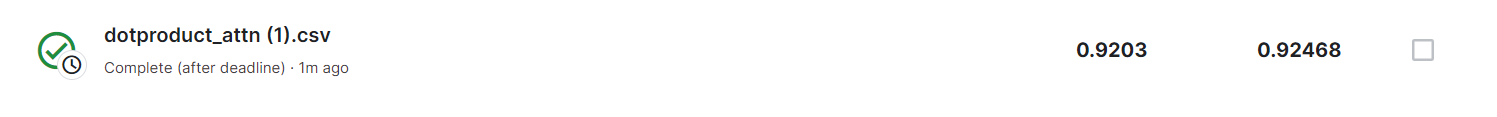

## BilinearAttention

In [32]:
import torch

encoder = PytorchSeq2SeqWrapper(nn.LSTM(EMBEDDING_DIM, HIDDEN_DIM, batch_first=True, dropout=0.3, num_layers=NUM_LAYERS))

model = SimpleSeq2Seq(vocab, source_embedder, encoder, MAX_DECODING_STEPS,
                          target_embedding_dim=EMBEDDING_DIM,
                          target_namespace='target_tokens',
                          attention=BilinearAttention(HIDDEN_DIM, HIDDEN_DIM))

optimizer = torch.optim.Adam(model.parameters())

trainer = Trainer(model=model,
                  optimizer=optimizer,
                  iterator=iterator,
                  train_dataset=dataset_train,
                  num_epochs=N_EPOCHS,
                  cuda_device=0,
                  )

model.cuda()
trainer.train()
model.cpu()

loss: 0.4882 ||: 100%|██████████| 10938/10938 [06:23<00:00, 28.50it/s]
loss: 0.0330 ||: 100%|██████████| 10938/10938 [06:25<00:00, 28.36it/s]
loss: 0.0225 ||: 100%|██████████| 10938/10938 [06:24<00:00, 28.44it/s]
loss: 0.0191 ||: 100%|██████████| 10938/10938 [06:21<00:00, 28.68it/s]


SimpleSeq2Seq(
  (_source_embedder): BasicTextFieldEmbedder(
    (token_embedder_tokens): Embedding()
  )
  (_encoder): PytorchSeq2SeqWrapper(
    (_module): LSTM(256, 64, num_layers=2, batch_first=True, dropout=0.3)
  )
  (_attention): BilinearAttention()
  (_target_embedder): Embedding()
  (_decoder_cell): LSTMCell(320, 64)
  (_output_projection_layer): Linear(in_features=64, out_features=592, bias=True)
)

In [33]:
from tqdm.notebook import tqdm
import math

def tokens2text(tokens, start=0, end=None):
        tokens = list(tokens)
        end = len(tokens) if end is None else end
        tokens = tokens[start:end]
        text = map(str, tokens)
        text = ''.join(text)
        return text
    
model.cuda()
predictor = SimpleSeq2SeqPredictor(model, reader)

preds = []
for batch_num in tqdm(range(math.ceil(len(dataset_submit) / 100))):
      y_pred = predictor.predict_batch_instance(dataset_submit[batch_num * 100: min(((batch_num + 1) * 100), len(dataset_submit))])
      y_pred = list(map(lambda x : ''.join(x['predicted_tokens']), y_pred))
      preds += y_pred
model.cpu()

  0%|          | 0/9561 [00:00<?, ?it/s]

SimpleSeq2Seq(
  (_source_embedder): BasicTextFieldEmbedder(
    (token_embedder_tokens): Embedding()
  )
  (_encoder): PytorchSeq2SeqWrapper(
    (_module): LSTM(256, 64, num_layers=2, batch_first=True, dropout=0.3)
  )
  (_attention): BilinearAttention()
  (_target_embedder): Embedding()
  (_decoder_cell): LSTMCell(320, 64)
  (_output_projection_layer): Linear(in_features=64, out_features=592, bias=True)
)

In [34]:
df_test2['id'] = df_test2['sentence_id'].astype(str) + '_' + df_test2['token_id'].astype(str)
df_test2['after'] = preds[1:]
df_test2[['id', 'after']].to_csv('bilinear_attn.csv', index=False)

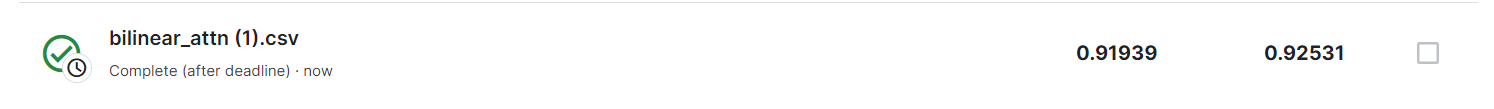

## AdditiveAttention

In [35]:
import torch

encoder = PytorchSeq2SeqWrapper(nn.LSTM(EMBEDDING_DIM, HIDDEN_DIM, batch_first=True, dropout=0.3, num_layers=NUM_LAYERS))

model = SimpleSeq2Seq(vocab, source_embedder, encoder, MAX_DECODING_STEPS,
                          target_embedding_dim=EMBEDDING_DIM,
                          target_namespace='target_tokens',
                          attention=AdditiveAttention(HIDDEN_DIM, HIDDEN_DIM))

optimizer = torch.optim.Adam(model.parameters())

trainer = Trainer(model=model,
                  optimizer=optimizer,
                  iterator=iterator,
                  train_dataset=dataset_train,
                  num_epochs=N_EPOCHS,
                  cuda_device=0,
                  )

model.cuda()
trainer.train()
model.cpu()

loss: 0.5195 ||: 100%|██████████| 10938/10938 [06:54<00:00, 26.38it/s]
loss: 0.0321 ||: 100%|██████████| 10938/10938 [06:59<00:00, 26.10it/s]
loss: 0.0216 ||: 100%|██████████| 10938/10938 [06:57<00:00, 26.19it/s]
loss: 0.0162 ||: 100%|██████████| 10938/10938 [07:10<00:00, 25.40it/s]


SimpleSeq2Seq(
  (_source_embedder): BasicTextFieldEmbedder(
    (token_embedder_tokens): Embedding()
  )
  (_encoder): PytorchSeq2SeqWrapper(
    (_module): LSTM(256, 64, num_layers=2, batch_first=True, dropout=0.3)
  )
  (_attention): AdditiveAttention()
  (_target_embedder): Embedding()
  (_decoder_cell): LSTMCell(320, 64)
  (_output_projection_layer): Linear(in_features=64, out_features=592, bias=True)
)

In [36]:
from tqdm.notebook import tqdm
import math

def tokens2text(tokens, start=0, end=None):
        tokens = list(tokens)
        end = len(tokens) if end is None else end
        tokens = tokens[start:end]
        text = map(str, tokens)
        text = ''.join(text)
        return text
    
model.cuda()
predictor = SimpleSeq2SeqPredictor(model, reader)

preds = []
for batch_num in tqdm(range(math.ceil(len(dataset_submit) / 100))):
      y_pred = predictor.predict_batch_instance(dataset_submit[batch_num * 100: min(((batch_num + 1) * 100), len(dataset_submit))])
      y_pred = list(map(lambda x : ''.join(x['predicted_tokens']), y_pred))
      preds += y_pred
model.cpu()

  0%|          | 0/9561 [00:00<?, ?it/s]

SimpleSeq2Seq(
  (_source_embedder): BasicTextFieldEmbedder(
    (token_embedder_tokens): Embedding()
  )
  (_encoder): PytorchSeq2SeqWrapper(
    (_module): LSTM(256, 64, num_layers=2, batch_first=True, dropout=0.3)
  )
  (_attention): AdditiveAttention()
  (_target_embedder): Embedding()
  (_decoder_cell): LSTMCell(320, 64)
  (_output_projection_layer): Linear(in_features=64, out_features=592, bias=True)
)

In [37]:
df_test2['id'] = df_test2['sentence_id'].astype(str) + '_' + df_test2['token_id'].astype(str)
df_test2['after'] = preds[1:]
df_test2[['id', 'after']].to_csv('additive_attn.csv', index=False)

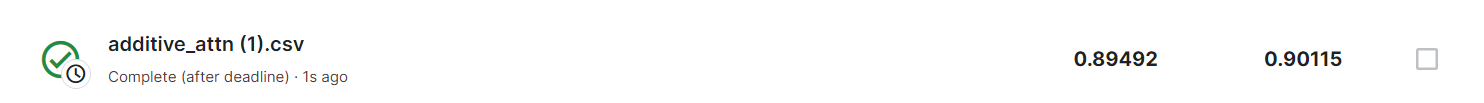

## Часть 3. [2 балла]  Дополнительные признаки
Предложите и покажите, как можно было бы повысить качество нейросетевых моделей. Можно попробовать сделать:

1. [1 балл] добавление морфологических признаков 
2. [1 балл] использование эмбеддингов слов 
3. [бонус на 3 балла] реализация ещё одной архитектуры (например transformer, pyramid-LSTM или convolutional encoder + convolutional decoder) и ансамблирования нейронных сетей

## Реализация еще одной архитектуры, похожей на transformer - StackedSelfAttentionEncoder

In [12]:
encoder = StackedSelfAttentionEncoder(
    input_dim=EMBEDDING_DIM,
    hidden_dim=HIDDEN_DIM,
    projection_dim=128,
    feedforward_hidden_dim=128,
    num_layers=1,
    num_attention_heads=8)

In [20]:
model = SimpleSeq2Seq(vocab, source_embedder, encoder, MAX_DECODING_STEPS,
                              target_embedding_dim=EMBEDDING_DIM,
                              target_namespace='target_tokens')
optimizer = torch.optim.Adam(model.parameters())
trainer = Trainer(model=model,
                  optimizer=optimizer,
                  iterator=iterator,
                  train_dataset=dataset_train,
                  num_epochs=N_EPOCHS,
                  cuda_device=0)
model.cuda()
trainer.train()
model.cpu()

loss: 1.1059 ||: 100%|██████████| 10938/10938 [04:25<00:00, 41.23it/s]
loss: 0.6102 ||: 100%|██████████| 10938/10938 [04:15<00:00, 42.76it/s]
loss: 0.5075 ||: 100%|██████████| 10938/10938 [04:00<00:00, 45.41it/s]
loss: 0.4470 ||: 100%|██████████| 10938/10938 [04:10<00:00, 43.68it/s]


SimpleSeq2Seq(
  (_source_embedder): BasicTextFieldEmbedder(
    (token_embedder_tokens): Embedding()
  )
  (_encoder): StackedSelfAttentionEncoder(
    (feedforward_0): FeedForward(
      (_linear_layers): ModuleList(
        (0): Linear(in_features=256, out_features=128, bias=True)
        (1): Linear(in_features=128, out_features=64, bias=True)
      )
      (_dropout): ModuleList(
        (0): Dropout(p=0.1, inplace=False)
        (1): Dropout(p=0.1, inplace=False)
      )
    )
    (feedforward_layer_norm_0): LayerNorm()
    (self_attention_0): MultiHeadSelfAttention(
      (_combined_projection): Linear(in_features=64, out_features=384, bias=True)
      (_output_projection): Linear(in_features=128, out_features=64, bias=True)
      (_attention_dropout): Dropout(p=0.1, inplace=False)
    )
    (layer_norm_0): LayerNorm()
    (dropout): Dropout(p=0.2, inplace=False)
  )
  (_target_embedder): Embedding()
  (_decoder_cell): LSTMCell(256, 64)
  (_output_projection_layer): Linear(in_fe

In [26]:
model.cuda()
predictor = SimpleSeq2SeqPredictor(model, reader)

preds = []
for batch_num in tqdm(range(math.ceil(len(dataset_submit) / 100))):
      y_pred = predictor.predict_batch_instance(dataset_submit[batch_num * 100: min(((batch_num + 1) * 100), len(dataset_submit))])
      y_pred = list(map(lambda x : ''.join(x['predicted_tokens']), y_pred))
      preds += y_pred
model.cpu()

  0%|          | 0/9561 [00:00<?, ?it/s]

SimpleSeq2Seq(
  (_source_embedder): BasicTextFieldEmbedder(
    (token_embedder_tokens): Embedding()
  )
  (_encoder): StackedSelfAttentionEncoder(
    (feedforward_0): FeedForward(
      (_linear_layers): ModuleList(
        (0): Linear(in_features=256, out_features=128, bias=True)
        (1): Linear(in_features=128, out_features=64, bias=True)
      )
      (_dropout): ModuleList(
        (0): Dropout(p=0.1, inplace=False)
        (1): Dropout(p=0.1, inplace=False)
      )
    )
    (feedforward_layer_norm_0): LayerNorm()
    (self_attention_0): MultiHeadSelfAttention(
      (_combined_projection): Linear(in_features=64, out_features=384, bias=True)
      (_output_projection): Linear(in_features=128, out_features=64, bias=True)
      (_attention_dropout): Dropout(p=0.1, inplace=False)
    )
    (layer_norm_0): LayerNorm()
    (dropout): Dropout(p=0.2, inplace=False)
  )
  (_target_embedder): Embedding()
  (_decoder_cell): LSTMCell(256, 64)
  (_output_projection_layer): Linear(in_fe

In [27]:
df_test2['id'] = df_test2['sentence_id'].astype(str) + '_' + df_test2['token_id'].astype(str)
df_test2['after'] = preds[1:]
df_test2[['id', 'after']].to_csv('transformer.csv', index=False)

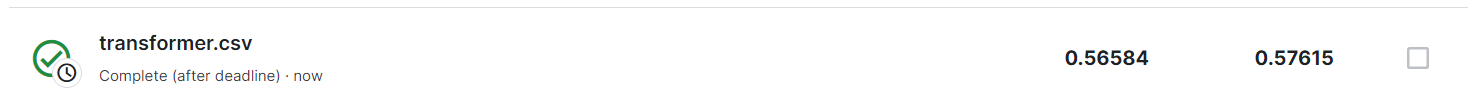

Качество получилось хуже

## Часть 4. [1 балл] Итоги
Напишите краткое резюме проделанной работы. Проведите анализ ошибок: когда модель ошибается? Можно ли сказать, почему модель ошибается? Что помогло вам в выполнении работы, чего не хватало?

В рамках данного домашнего задания мы научились работать с задачей нормализации текста. В предложенном датасете слова нормализовавались до формы, которую мы слышим. Мы использовали архитектуру lstm encoder + decoder с 3 вариантами механизма внимания и без механизма внимания вовсе. По результатам автопроверки kaggle видно, что использование механизма внимания существенно повышает качество модели в нашей задаче. Также мы реализовали и обучили трансформер модель, однако ее качество получилось хуже, на наш взгляд это связано с тем, что для качественного обучения трансформера требуется больше времени, которым мы не располагали, плюс были ограничения в вычислительных ресурсах. Мы никак не использовали информацию о контексте нормализуемого токена, поэтому, это могло привести к ошибкам модели. Были проблемы с настройкой версий библиотеки allennlp.